# Taylor Hobson Data Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation
from pandas.core.frame import DataFrame
import math
from scipy.interpolate import interp1d

In [4]:
df = pd.read_csv('OTN_DATA_19.txt', sep=',')
index = df.index
columns = df.columns
values = df.values

df['Y'] = (60*df['H']*60 + df['M.1']*60 + df['S'])/10-4517.8

In [5]:
df19 = pd.pivot_table(df, ['X', 'Y.1', 'Z'], 'Y')
df19_angle = df19.values

angleArray_19,index = [],[]
for i,j in enumerate(df19_angle[0:len(df19_angle)-1]):
    a = df19_angle[i]
    b = df19_angle[i+1]
    A = np.linalg.norm(a)
    B = np.linalg.norm(b)
    ans = np.arccos((np.dot(a,b))/(A*B))
    angleArray_19.append(ans)
    index.append(i)

df19_drop = df19.drop(df19.index[0])
Time_19 = list(df19_drop.index)

A19 = {'Time_19': Time_19, 'angleArray_19': angleArray_19}


In [6]:
df2 = pd.read_csv('OTN_DATA_22.txt', sep=',')
index = df2.index
columns = df2.columns
values = df2.values

df2['Y'] = (60*df['H']*60 + df2['M.1']*60 + df2['S'])/10
df2.tail()

,UID,VBAT,DID,Y,M,D,H,M.1,S,X,Y.1,Z,T,CHECKSUM
485,1000101022,4528,485,4394.6,11,13,14,12,26,0.240425,-0.702213,89.253067,19.7,227
486,1000101022,4549,486,4394.9,11,13,14,12,29,0.242479,-0.703301,89.255775,19.8,97
487,1000101022,4549,487,4395.1,11,13,14,12,31,0.239568,-0.704729,89.256790,19.8,55
488,1000101022,4549,488,4395.4,11,13,14,12,34,0.240414,-0.703894,87.651604,19.8,46
489,1000101022,4525,489,4395.8,11,13,14,12,38,-0.390168,-88.753807,-1.191017,19.8,50


In [7]:
df22 = pd.pivot_table(df2, ['X', 'Y.1', 'Z'], 'Y')
df22_angle = df22.values

In [8]:
angleArray_22,index = [],[]
for i,j in enumerate(df22_angle[0:len(df22_angle)-1]):
    a = df22_angle[i]
    b = df22_angle[i+1]
    A = np.linalg.norm(a)
    B = np.linalg.norm(b)
    ans = np.arccos((np.dot(a,b))/(A*B))
    angleArray_22.append(ans)
    index.append(i)

df22_drop = df22.drop(df22.index[0])
Time_22 = list(df22_drop.index)

A22 = {'Time_22': Time_22, 'angleArray_22': angleArray_22}


In [9]:
df_h = pd.read_csv('high precision.csv', sep=',')
index = df_h.index
columns = df_h.columns
values = df_h.values

table_h = pd.pivot_table(df_h, ['X', 'Y', 'Z'], df_h['Deg'])

df_h_angle = table_h.values

angle_h,index = [],[]
for i,j in enumerate(df_h_angle[0:len(df_h_angle)-1]):
    a = df_h_angle[i]
    b = df_h_angle[i+1]
    A = np.linalg.norm(a)
    B = np.linalg.norm(b)
    ans = np.arccos((np.dot(a,b))/(A*B))
    angle_h.append(ans)
    index.append(i)
angle_h

[6.626002186241245e-05,
 5.6272159254919025e-05,
 2.4017353056939943e-05,
 3.150824019622676e-05,
 5.2776898559789974e-05,
 9.99603158233266e-05,
 2.2994862459155376e-05,
 2.983681351931191e-05,
 4.1793432669531894e-05,
 4.098020353875062e-05,
 2.429615026474307e-05,
 5.0419747468054526e-05,
 4.29645881269627e-05,
 5.04049987801069e-05,
 3.6972237341801294e-05,
 5.7941413530445875e-05,
 5.09492122058842e-05,
 3.016752136465169e-05,
 1.8391486180860216e-05,
 5.371037512490426e-05,
 1.5444304188410293e-05,
 5.5965135226007946e-05,
 4.309810999704246e-05,
 5.09989232284881e-05,
 5.6880511788786824e-05,
 4.332635553488939e-05,
 2.7472896321620844e-05,
 5.596961441338986e-05,
 6.87314973910039e-05,
 2.0481915732787505e-06]

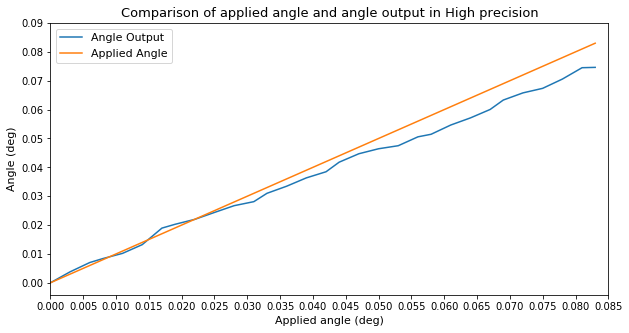

In [10]:
control = table_h.index
result = [0]

for i in range(30):
    ang = result[i]+angle_h[i]
    result.append(ang)

result_deg = []    
for j in range(31):
    deg = math.degrees(result[j])
    result_deg.append(deg)

x1=[]
for i in range(18):
    a=i*0.005
    x1.append(a)
y1=[]
for j in range(10):
    b=j*0.01
    y1.append(b)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(control, result_deg,label='Angle Output')
ax.plot(control,control, label='Applied Angle')
plt.title('Comparison of applied angle and angle output in High precision', fontsize=13)
plt.xlim(0,0.085)
plt.xticks(x1)
plt.yticks(y1)
plt.tick_params(labelsize=10)
plt.xlabel('Applied angle (deg)',fontsize=11)
plt.ylabel('Angle (deg)',fontsize=11)
ax.legend(fontsize=11)

Text(0,0.5,'Residual (deg)')

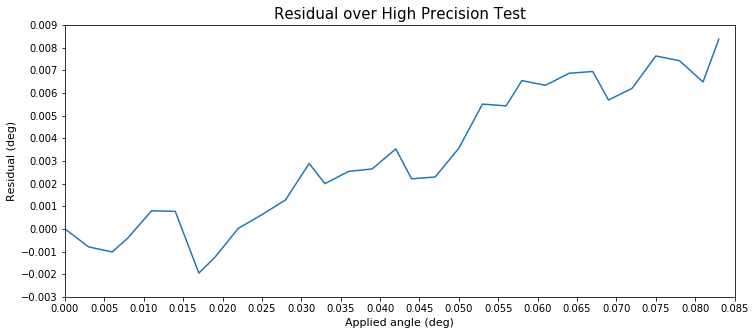

In [11]:
residual = []
for k in range(31):
    c = control[k]-result_deg[k]
    residual.append(c)

y2=[]
for z in range(13):
    d=-0.003+z*0.001
    y2.append(d)
    
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(control,residual)
plt.title('Residual over High Precision Test', fontsize=15)
plt.xlim(0,0.085)
plt.xticks(x1)
plt.ylim(-0.003,0.009)
plt.yticks(y2)
plt.tick_params(labelsize=10)
plt.xlabel('Applied angle (deg)',fontsize=11)
plt.ylabel('Residual (deg)',fontsize=11)

Text(0.5,1,'Percentage Error over High Precision Test')

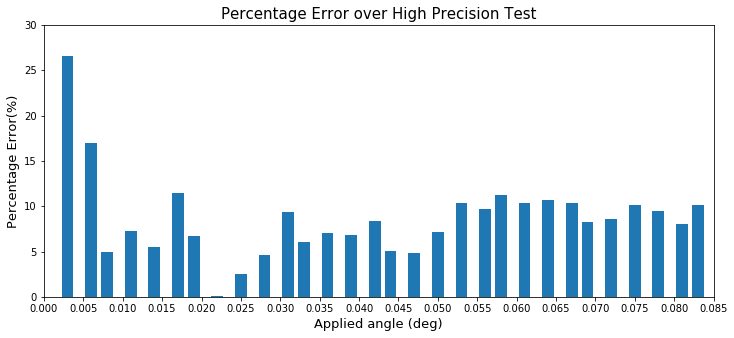

In [12]:
error = [0]
i=0
for i in range(30):
    e = (abs(residual[i+1])/control[i+1])*100
    error.append(e)
    
control=list(control)

dic1 = {'angle':control,'error':error}
dff = DataFrame(dic1)

y3=[0,5,10,15,20,25,30]
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(dff['angle'],dff['error'],width=0.0015)
plt.xticks(x1)
plt.xlim(0,0.085)
plt.tick_params(labelsize=10)
plt.yticks(y3)
plt.xlabel('Applied angle (deg)',fontsize=13)
plt.ylabel('Percentage Error(%)',fontsize=13)
plt.title('Percentage Error over High Precision Test', fontsize=15)

In [13]:
df_19_into = pd.read_csv('into_return.csv', sep=',')
index = df_19_into.index
columns = df_19_into.columns
values = df_19_into.values
df_19_into.head()

,Orientation,Deg,Reading ID,X,Y,Z
0,A into Plate,0,269,0.113379,-0.783929,89.206856
1,A into Plate,30,286,-29.991766,-0.732887,59.998375
2,A into Plate,60,305,-60.080803,-0.564829,29.914030
3,A into Plate,90,325,-89.659210,-0.328370,-0.118938
4,A into Plate,120,349,-59.992241,-0.086792,-30.015268


In [14]:
table_19_into = pd.pivot_table(df_19_into, ['X', 'Y', 'Z'], df_19_into.index)
table_19_into.head()

,X,Y,Z
0,0.113379,-0.783929,89.206856
1,-29.991766,-0.732887,59.998375
2,-60.080803,-0.564829,29.914030
3,-89.659210,-0.328370,-0.118938
4,-59.992241,-0.086792,-30.015268


In [15]:
df_19_into_angle = table_19_into.values

In [16]:
angle19,index = [],[]
for i,j in enumerate(df_19_into_angle[0:len(df_19_into_angle)-1]):
    a = df_19_into_angle[i]
    b = df_19_into_angle[i+1]
    A = np.linalg.norm(a)
    B = np.linalg.norm(b)
    ans = np.arccos((np.dot(a,b))/(A*B))
    angle19.append(ans)
    index.append(i)
angle19

[0.4648014491297895,
 0.6452576182377416,
 0.4633054041850983,
 0.46258086308505014,
 0.6395556338655604,
 0.463993702543619,
 0.4611825356359568,
 0.645103378136611,
 0.4663239984580593,
 0.4624745758937847,
 0.6429575714695156,
 0.46559461349987613,
 2.881392964245814e-05,
 0.46546216330843204,
 0.6430276263617806,
 0.46253037547082576,
 0.4663351675196712,
 0.6451139570656612,
 0.4612935727370108,
 0.4638534667980336,
 0.6394889296166142,
 0.4626923025059156,
 0.46331947932816525,
 0.6453198524098799,
 0.4647850168684843]

Text(0.5,1,'Sensor 19 Histogram')

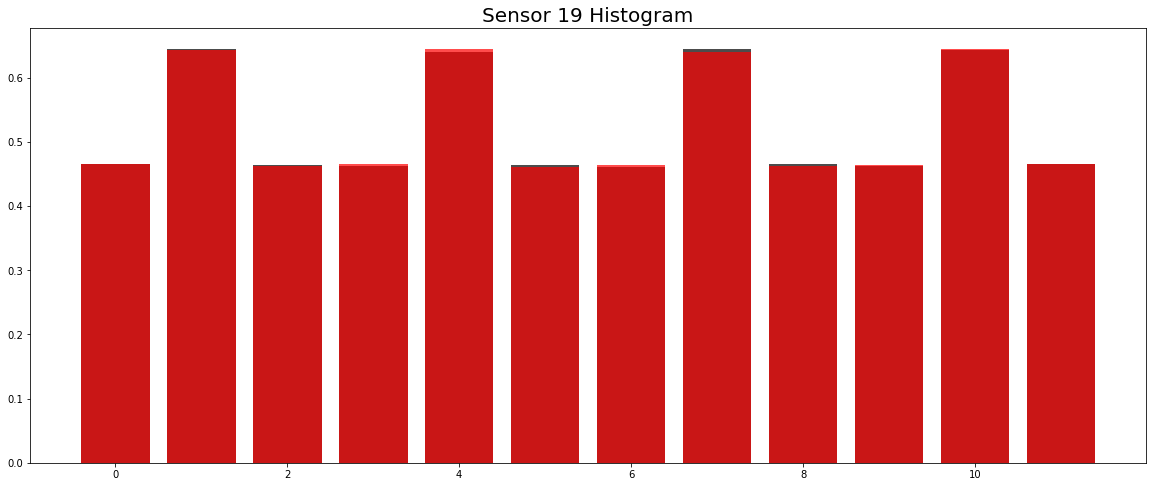

In [17]:
df_19_drop = table_19_into.drop(table_19_into.index[0])
index_into = df_19_drop.index
A19_dic = {'Index': index_into, 'angleArray_into': angle19}
A19_into = DataFrame(A19_dic)

S19_into = A19_into

S19top = S19_into.iloc[0:12]

S19bot = S19_into.iloc[13:25]

s19Top = S19top
s19Bot = S19bot


s19Top = s19Top.reset_index(drop=True)
s19Bot = s19Bot.reset_index(drop=True)

s19Top['index1'] = s19Top.index
s19Bot['index1'] = s19Bot.index

fig, ax1 = plt.subplots(figsize=(20,8))
ax1.bar(s19Top['index1'], s19Top['angleArray_into'], color='black',alpha=0.7)
ax1.bar(s19Bot['index1'], s19Bot['angleArray_into'], color='red', alpha=0.7)
ax1.set_title('Sensor 19 Histogram', fontsize=20)

In [18]:
his = []
index = []
d = math.radians(30)

for i in range(12):
    a = (abs((angle19[i] - angle19[24-i]))/angle19[24-i])*100
    his.append(a)
    index.append((i+1)*30)

dic = {'index':index, 'his':his}
data = DataFrame(dic)
data

,index,his
0,30,0.003535
1,60,0.009644
2,90,0.003038
3,120,0.024085
4,150,0.010431
5,180,0.030233
6,210,0.024071
7,240,0.001640
8,270,0.002395
9,300,0.012064


([<matplotlib.axis.YTick at 0x1ee67445390>,
 <a list of 8 Text yticklabel objects>)

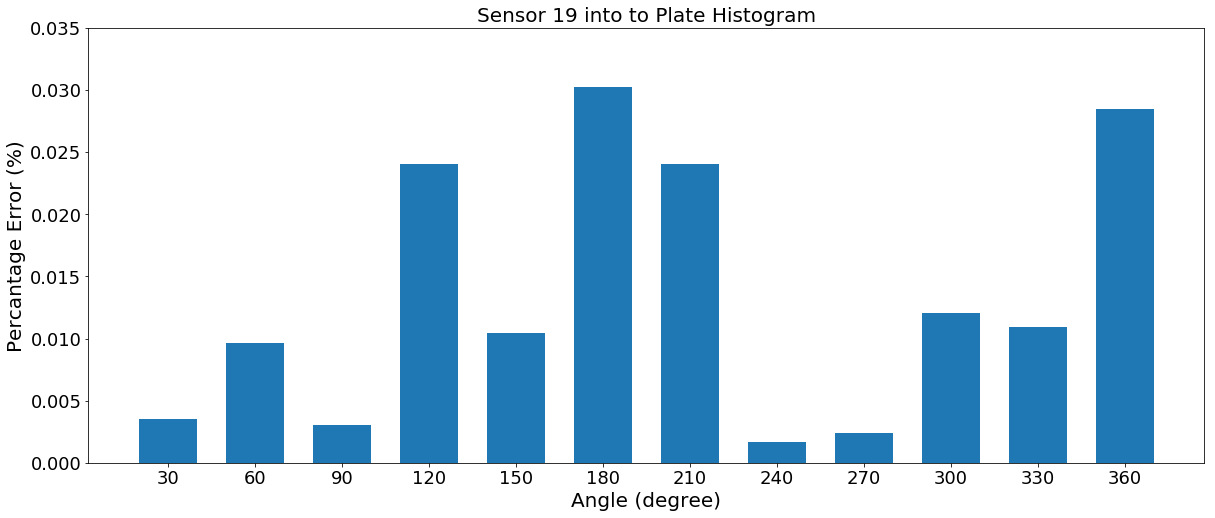

In [19]:
fig, ax1 = plt.subplots(figsize=(20,8))
ax1.bar(data['index'], data['his'],width=20)
ax1.set_title('Sensor 19 into to Plate Histogram', fontsize=20)
plt.ylabel('Percantage Error (%)', fontsize=20)
plt.xlabel('Angle (degree)', fontsize=20)
plt.xticks(index)
plt.ylim(0,0.035)
plt.tick_params(labelsize=18)
y=[0,0.005,0.010,0.015,0.020,0.025,0.030,0.035]
plt.yticks(y)

In [20]:
df_19_para = pd.read_csv('19_A parallel.csv', sep=',')
index = df_19_para.index
columns = df_19_para.columns
values = df_19_para.values

table_19_para = pd.pivot_table(df_19_para, ['X', 'Y', 'Z'], df_19_para.index)

df_19_para_angle = table_19_para.values

angle19_para,index = [],[]
for i,j in enumerate(df_19_para_angle[0:len(df_19_para_angle)-1]):
    a = df_19_para_angle[i]
    b = df_19_para_angle[i+1]
    A = np.linalg.norm(a)
    B = np.linalg.norm(b)
    ans = np.arccos((np.dot(a,b))/(A*B))
    angle19_para.append(ans)
    index.append(i)

angle19_para

[6.903258006138537e-05,
 6.085227939732405e-05,
 4.193195497601474e-05,
 2.4674212749404365e-05,
 1.5774548576745446,
 3.962165803104409e-05,
 3.9883889771609884e-05,
 4.987874525767765e-05,
 3.4312346419361675e-05,
 2.049641586869149e-05,
 2.666919479598238e-05,
 1.5157074129852615e-05,
 2.211870464788129e-05,
 2.0872367707718772e-05,
 1.3802787238958684e-05,
 2.423885374877741e-05,
 3.1819279613541e-05,
 1.9180949260556244e-05,
 4.6267870355225516e-05,
 4.583300216537465e-05,
 4.139439858284272e-05,
 4.092420196744477e-05,
 5.514415044672245e-05,
 6.952336971391766e-05,
 3.9353636642948335e-05,
 0.005779877794218465,
 0.005827791137827833,
 0.2788399684551214,
 0.3599008725301416,
 0.2597307416367204,
 0.3961362347311671,
 0.1917970876176214,
 0.2113718929708991,
 0.1252539696481904,
 0.21304855123218486,
 0.44303568885491135,
 0.0,
 0.7813381047931465,
 0.7993048280712607,
 0.89847075405675,
 0.0005019531911531061,
 3.18965124686052e-05,
 3.110553064919998e-05,
 1.6595625992469313e-

In [21]:
df_19_skew = pd.read_csv('19_skew.csv', sep=',')
index = df_19_skew.index
columns = df_19_skew.columns
values = df_19_skew.values

table_19_skew = pd.pivot_table(df_19_skew, ['X', 'Y', 'Z'], df_19_skew.index)

df_19_skew_angle = table_19_skew.values

angle19_skew,index = [],[]
for i,j in enumerate(df_19_skew_angle[0:len(df_19_skew_angle)-1]):
    a = df_19_skew_angle[i]
    b = df_19_skew_angle[i+1]
    A = np.linalg.norm(a)
    B = np.linalg.norm(b)
    ans = np.arccos((np.dot(a,b))/(A*B))
    angle19_skew.append(ans)
    index.append(i)

angle19_skew

[0.4661541621482842,
 0.6283581214956104,
 0.472938326282171,
 0.481539333164439,
 0.6289614984607673,
 0.45863667186328627,
 0.4599531786140046,
 0.6313676779429225,
 0.48008475119310184,
 0.4867745422272349,
 0.6351677318005344,
 0.45754379277461127]

In [22]:
df_22_into = pd.read_csv('22_into.csv', sep=',')
index = df_22_into.index
columns = df_22_into.columns
values = df_22_into.values

table_22_into = pd.pivot_table(df_22_into, ['X', 'Y', 'Z'], df_22_into.index)

df_22_into_angle = table_22_into.values

angle22_into,index = [],[]
for i,j in enumerate(df_22_into_angle[0:len(df_22_into_angle)-1]):
    a = df_22_into_angle[i]
    b = df_22_into_angle[i+1]
    A = np.linalg.norm(a)
    B = np.linalg.norm(b)
    ans = np.arccos((np.dot(a,b))/(A*B))
    angle22_into.append(ans)
    index.append(i)

angle22_into

[0.21386249833535398,
 4.820258017155846e-05,
 1.8563312568293807e-05,
 3.8249019714156915e-05,
 5.2863107939900736e-05,
 1.2776410603949055,
 1.8607388846228827,
 2.029256695502348,
 1.1155833343970207,
 2.041190070724609,
 2.202566352742567,
 2.0316746818913325]

In [23]:
df_22_para = pd.read_csv('22_para.csv', sep=',')
index = df_22_para.index
columns = df_22_para.columns
values = df_22_para.values

table_22_para = pd.pivot_table(df_22_para, ['X', 'Y', 'Z'], df_22_para.index)

df_22_para_angle = table_22_para.values

angle22_para,index = [],[]
for i,j in enumerate(df_22_para_angle[0:len(df_22_para_angle)-1]):
    a = df_22_para_angle[i]
    b = df_22_para_angle[i+1]
    A = np.linalg.norm(a)
    B = np.linalg.norm(b)
    ans = np.arccos((np.dot(a,b))/(A*B))
    angle22_para.append(ans)
    index.append(i)

angle22_para

[0.21386249833535398,
 4.820258017155846e-05,
 1.8563312568293807e-05,
 3.8249019714156915e-05,
 5.2863107939900736e-05,
 1.2776410603949055,
 1.8607388846228827,
 2.029256695502348,
 1.1155833343970207,
 2.041190070724609,
 2.202566352742567,
 2.0316746818913325]

In [24]:
df_22_skew = pd.read_csv('22_skew.csv', sep=',')
index = df_22_skew.index
columns = df_22_skew.columns
values = df_22_skew.values

table_22_skew = pd.pivot_table(df_22_skew, ['X', 'Y', 'Z'], df_22_skew.index)

df_22_skew_angle = table_22_skew.values

angle22_skew,index = [],[]
for i,j in enumerate(df_22_skew_angle[0:len(df_22_skew_angle)-1]):
    a = df_22_skew_angle[i]
    b = df_22_skew_angle[i+1]
    A = np.linalg.norm(a)
    B = np.linalg.norm(b)
    ans = np.arccos((np.dot(a,b))/(A*B))
    angle22_skew.append(ans)
    index.append(i)

angle22_skew

[0.21386249833535398,
 4.820258017155846e-05,
 1.8563312568293807e-05,
 3.8249019714156915e-05,
 5.2863107939900736e-05,
 1.2776410603949055,
 1.8607388846228827,
 2.029256695502348,
 1.1155833343970207,
 2.041190070724609,
 2.202566352742567,
 2.0316746818913325]

In [25]:
del_19_into = np.array([0,2.865391197,4.025116669,3.368832911,1.236130601,-1.482709889,-3.601711564,-4.229198913,-3.037634495,-0.147156309,2.720522818,3.917047974,
3.348909508,
1.324989685,
-1.264277097,
-3.294940054,
-3.892374757,
-2.723402166,
0.120167103,
3.05040234,
4.278571222,
3.69634412,
1.604000749,
-1.110538281,
-3.265363497,
-3.950647352,
-2.822910013,
0.016238086,
2.902870974,
4.107805612,
3.518396531,
1.455920282,
-1.215241858,
-3.320361632,
-3.968996094,
-2.832978007,
0.003023911])
index_19_into = np.array([0,
10,
20,
30,
40,
50,
60,
70,
80,
90,
100,
110,
120,
130,
140,
150,
160,
170,
180,
190,
200,
210,
220,
230,
240,
250,
260,
270,
280,
290,
300,
310,
320,
330,
340,
350,
360])


In [26]:
del_19_para = np.array([0,
2.964101339,
4.230694991,
3.664561258,
1.55998053,
-1.216733299,
-3.460292272,
-4.233781146,
-3.178828061,
-0.389704881,
2.455628781,
3.606940001,
2.966455722,
0.873311185,
-1.789190491,
-3.854734917,
-4.455794972,
-3.266989572,
-0.391882261,
2.526183704,
3.763762323,
3.210822849,
1.180671425,
-1.461362047,
-3.55700842,
-4.20691166,
-3.06983554,
-0.232406443,
2.728499925,
4.03041797,
3.554524633,
1.598209529,
-1.001783598,
-3.106251706,
-3.813372968,
-2.753403381,
0.000425396])
index_19_para = index_19_into


In [27]:
del_19_skew = np.array([0,
-3.291333906,
2.710934478,
-0.191695456,
-2.601523996,
3.435315342,
-0.28673903,
-3.933363122,
2.241340145,
-0.251829803,
-2.361702959,
4.030727356,0.246055624])
index_19_skew = np.array([360,
330,
300,
270,
240,
210,
180,
150,
120,
90,
60,
30,
0])


In [28]:
del_22_into = np.array([0,
3.410857682,
-3.51334887,
-0.113640663,
3.471061637,
-3.172227021,
0.182864087,
3.985297005,
-2.832921025,
0.251200386,
3.908570542,
-3.098956187,
0.00574559])
index_22_into = np.array([0,
30,
60,
90,
120,
150,
180,
210,
240,
270,
300,
330,
360])


In [29]:
del_22_para = np.array([0,
3.597494734,
-3.578711148,
-0.509868981,
2.605494239,
-4.270532697,
-0.59091027,
2.975152557,
-3.586583942,
-0.147568607,
3.737068106,
-3.012194942,
-0.0010358122])
index_22_para = np.array([0,
30,
60,
90,
120,
150,
180,
210,
240,
270,
300,
330,
360])


In [30]:
del_22_skew = np.array([0,
3.67768261,
-2.879709712,
-0.649820638,
1.660998641,
-5.18587502,
-0.740135284,
2.355019037,
-3.037406757,
-0.342475376,
2.679792229,
-3.456096985,
-0.222720045])
index_22_skew = index_22_into


In [31]:
index_19_into_return = np.array([360,
330,
300,
270,
240,
210,
180,
150,
120,
90,
60,
30,
0])

del_19_into_return  = [0,
-3.330982519,
3.511786581,
0.012824993,
-3.26813807,
3.694168975,
0.124343809,
-3.298810231,
3.341206482,
-0.148477372,
-3.60222664,
3.371877339,
0.002097187]


In [32]:
del_19_para_return = np.array([0,
-3.105480455,
3.556390846,
-0.233596399,
-3.553925016,
3.213432401,
-0.388788882,
-3.849741293,
2.974951802,
-0.386611751,
-3.455396671,
3.665761571,
0.00040214])
index_19_para_return=index_19_into_return

(0, 360)

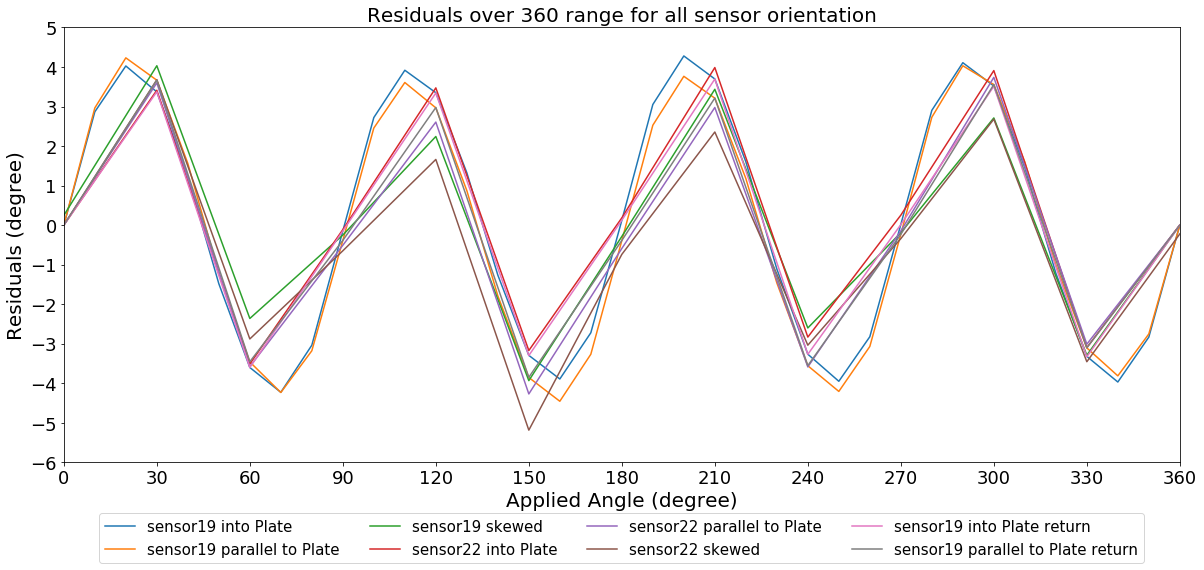

In [33]:
fig, ax1 = plt.subplots(figsize=(20,8))
ax1.plot(index_19_into,del_19_into,label='sensor19 into Plate')
ax1.plot(index_19_para,del_19_para,label='sensor19 parallel to Plate')
ax1.plot(index_19_skew,del_19_skew,label='sensor19 skewed')
ax1.plot(index_22_into,del_22_into,label='sensor22 into Plate')
ax1.plot(index_22_para,del_22_para,label='sensor22 parallel to Plate')
ax1.plot(index_22_skew,del_22_skew,label='sensor22 skewed')
ax1.plot(index_19_into_return,del_19_into_return,label='sensor19 into Plate return')
ax1.plot(index_19_para_return,del_19_para_return,label='sensor19 parallel to Plate return')
ax1.set_title('Residuals over 360 range for all sensor orientation', fontsize=20)
plt.ylabel('Residuals (degree)', fontsize=20)
plt.xlabel('Applied Angle (degree)', fontsize=20)
ax1.legend(loc='upper center',bbox_to_anchor=(0.5,-0.1),shadow=False, ncol=4,fontsize=15)
ax1.tick_params(labelsize=18)
y0 = [-6,-5,-4,-3,-2,-1,0,1,2,3,4,5]
plt.yticks(y0)
plt.xticks(index_22_para)
plt.xlim(0,360)

In [34]:
index_22_para


array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330, 360])

In [35]:
del_22_para


array([ 0.00000000e+00,  3.59749473e+00, -3.57871115e+00, -5.09868981e-01,
        2.60549424e+00, -4.27053270e+00, -5.90910270e-01,  2.97515256e+00,
       -3.58658394e+00, -1.47568607e-01,  3.73706811e+00, -3.01219494e+00,
       -1.03581220e-03])